In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b>1. Load the Dataset</b>

We'll use Seaborn's Titanic dataset for illustration.

In [25]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<b>2. Shape, Missing values, datatype </b>

Initial Data State


In [26]:
#shape
titanic.shape



(891, 15)

In [27]:
#Missing Data
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [28]:
#Data Types: 
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [29]:
#Quick stats: 
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Remove Columns with Excessive Missing Data</b>

If a column (e.g., "deck") has many missing values, consider dropping:

In [30]:
threshold = 0.7 * len(titanic)  # If over 70% missing, drop
cols_to_drop = [col for col in titanic.columns if titanic[col].isnull().sum() > threshold]
titanic_cleaned = titanic.drop(columns=cols_to_drop)
print("Dropped columns (too many NaNs):", cols_to_drop)

Dropped columns (too many NaNs): ['deck']


<b>Impute Missing Values with median or mode</b>

In [31]:
# Fill Age with median
titanic_cleaned['age'] = titanic_cleaned['age'].fillna(titanic_cleaned['age'].median())
# Fill Embarked with mode
titanic_cleaned['embarked'] = titanic_cleaned['embarked'].fillna(titanic_cleaned['embarked'].mode()[0])


<b>4. Handling Outliers</b>

Goal: Detect and optionally cap, remove, or flag outliers.

<b>A. Visual/Statistical Outlier Detection</b>

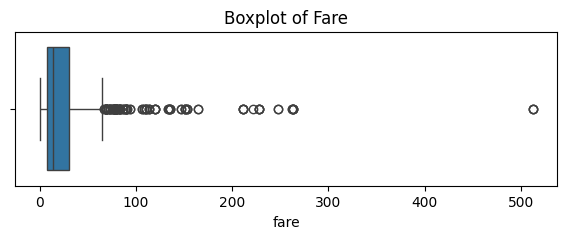

In [32]:
plt.figure(figsize=(7,2))
sns.boxplot(x=titanic_cleaned['fare'])
plt.title('Boxplot of Fare')
plt.show()

<b>B. Remove or Cap Outliers (e.g., using IQR method)</b>


In [33]:
Q1 = titanic_cleaned['fare'].quantile(0.25)
Q3 = titanic_cleaned['fare'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Option 1: Cap outliers
titanic_cleaned['fare'] = titanic_cleaned['fare'].clip(lower=lower_limit, upper=upper_limit)

# Option 2: Alternatively, remove outliers
# titanic_cleaned = titanic_cleaned[(titanic_cleaned['fare'] >= lower_limit) & (titanic_cleaned['fare'] <= upper_limit)]
titanic_cleaned

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,65.6344,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<b>5. Merge and Reshape Data (if relevant)</b>


In [34]:
# (Titanic dataset may not have both columns, so let's simulate a merge)
# Example: pd.merge(df1, df2, on='key_column')
# Here, let's just reshape: create a new column 'who_age'
titanic_cleaned['who_age'] = titanic_cleaned['who'] + ' - ' + titanic_cleaned['age'].astype(str)

# new_df = pd.merge(df1, df2, on='common_column')
titanic_cleaned

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,who_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,man - 22.0
1,1,1,female,38.0,1,0,65.6344,C,First,woman,False,Cherbourg,yes,False,woman - 38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,woman - 26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,woman - 35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,man - 35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,man - 27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,woman - 19.0
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False,woman - 28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,man - 26.0


<b>6. Document All Cleaning Steps</b>


Good practice: comment/markdown all cleaning actions in your notebook, or keep a “codebook” of changes.
Example documentation for audit or reproducibility:

<b>7. Final Cleaned Data Overview</b>

In [35]:
print("Final shape:", titanic_cleaned.shape)
print(titanic_cleaned.isnull().sum())
titanic_cleaned.head()

Final shape: (891, 15)
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
who_age        0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,who_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,man - 22.0
1,1,1,female,38.0,1,0,65.6344,C,First,woman,False,Cherbourg,yes,False,woman - 38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,woman - 26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,woman - 35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,man - 35.0
